# Hyperspectral Aerial Image Classification using Machine Learning

### Description:
Classification of Hyperspectral images (HSI) obtained from aerial sensors to estimate the land cover usage pattern using Machine Learning (ML).

### Value
The exercise of using classifying the land per the crop type using HSI, will enable us to understand the growing pattern, land usage, soil con-ditions, water access, human activity mapping and others,are  important  steps  in  the  goal  to  meet  the  challengesin  anticipated  food  production

### Data
Hyperspectral Imagery (HSI) refers to hundreds or even thousands of such bands captured in much narrower (10-20 nm) bands, offering very rich spectral information. Each such image is, in reality, a three-dimensional (3-D) volume with each voxel (3-D pixel) having both position information in the X and Y coordinates, and the spectral information content embedded in the Z direction

Data Source: http://www.ehu.eus/ccwintco/index.php?title=Hyperspectral_Remote_Sensing_Scenes


### Author:
Praveen Pankajakshan

### Author Email address:
praveen.pankaj@ieee.org

### Dated:
June 12, 2020, 11:47PM

Last Modified: June 17, 2020 01:42AM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import scipy.io as sio
from sklearn.model_selection import train_test_split, GridSearchCV
from time import time
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, classification_report
from scipy import ndimage

In [2]:
# Read raw 'Response Variables'  from .mat file
rawdata = sio.loadmat("Indian_pines_corrected.mat")
I = rawdata['indian_pines_corrected']
print('Size of the input image is:', I.shape)
print(type(I))
#shape of the imported data
nx, ny, nch = I.shape 

# Read the Ground Truth
gtdata = sio.loadmat("Indian_pines_gt.mat")
G = gtdata['indian_pines_gt'] #2d array 
print('Size of the Ground Truth image is:', G.shape)

# Store the input data before changing the values
Icopy = I.copy()
#Min-Max scaling on raw data ie, new range of reflectene values is [0,1]
I = I.astype(float)
I = I-np.min(I)
I = I/np.max(I)

#Reshape the 3d data to 2d table by flattening the spatial pixels and storing columns as spectrals bands
nclass = np.shape(np.unique(G))[0]

X = np.reshape(I, (nx*ny, nch))
Y = G.flatten()
df = pd.DataFrame(X)
df.columns = ["Band_" + str(i+1) for i in range(df.shape[1])]
df.index  = range(df.shape[0])
df['Class'] = Y

#In the raw data ground truth, class- is present which is the unclassified pixels
# So Class-0 is not considered for classification.Hence has to be removed
bckgrd_index = np.array(df[df['Class'] == 0].index, dtype = int) # index of the pixels with class= 0 is stored 
class_index = np.array(df[df['Class'] != 0].index, dtype = int)
bckgrd_rmvd_data = df.iloc[class_index,:]
X_bck_rmvd = X[class_index,:]
y_bck_rmvd = bckgrd_rmvd_data['Class']
y_bckgrd = Y[bckgrd_index]

Size of the input image is: (145, 145, 200)
<class 'numpy.ndarray'>
Size of the Ground Truth image is: (145, 145)


### Splitting the Data Into Testing and Training Data

In [3]:
#fraction of test data from main data
ntest = 0.90
X_train, X_test, y_train, y_test, train_index, test_index = train_test_split(X_bck_rmvd, y_bck_rmvd, class_index, test_size=ntest, random_state=0)

nval = 0.05
X_test, X_validation, y_test, y_validation, test_index, validation_index = train_test_split(X_test, y_test, test_index, test_size=nval, random_state=0)

#Training data count
n_train = X_train.shape[0]
#Number of classes present in the data
n_class = len(np.unique(y_bck_rmvd))

In [4]:
#training error
clf = SVC(C=35, gamma=8, kernel='rbf', 
          verbose=True, 
          class_weight='balanced', 
          probability=True)
clf.fit(X_train, y_train)
pred_train = clf.predict(X_train)
train_accuracy = accuracy_score(y_pred = pred_train, y_true= y_train)
print("train_accuracy:    ", train_accuracy)
#classification report
print('classification report training')
print(classification_report(y_train, pred_train))

[LibSVM]train_accuracy:     0.970703125
classification report training
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       0.96      0.93      0.94       169
           3       0.95      0.99      0.97        74
           4       1.00      1.00      1.00        28
           5       1.00      1.00      1.00        56
           6       1.00      1.00      1.00        83
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00        50
           9       1.00      1.00      1.00         1
          10       0.87      1.00      0.93        80
          11       0.98      0.93      0.95       235
          12       0.98      1.00      0.99        53
          13       1.00      1.00      1.00        20
          14       1.00      0.99      1.00       129
          15       0.97      1.00      0.98        32
          16       1.00      1.00      1.00         9

    accur

In [5]:
#validation error
pred_validation = clf.predict(X_validation)
validation_accuracy = accuracy_score(y_pred = pred_validation, y_true= y_validation)
print("validation_accuracy:    ", validation_accuracy)
print('classification report validation')
print(classification_report(y_validation, pred_validation))

validation_accuracy:     0.7922077922077922
classification report validation
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.69      0.70      0.70        70
           3       0.71      0.71      0.71        42
           4       0.58      0.58      0.58        12
           5       0.81      0.96      0.88        27
           6       0.93      1.00      0.96        25
           7       0.33      1.00      0.50         1
           8       0.97      1.00      0.98        28
           9       1.00      1.00      1.00         1
          10       0.69      0.64      0.67        45
          11       0.83      0.81      0.82       110
          12       0.58      0.67      0.62        21
          13       1.00      1.00      1.00        14
          14       0.98      0.88      0.92        49
          15       0.60      0.50      0.55        12
          16       1.00      1.00      1.00         4

   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [6]:
#test accuracy
pred_test = clf.predict(X_test)
test_accuracy = accuracy_score(y_pred = pred_test, y_true= y_test)
print("validation_accuracy:    ", test_accuracy)
print('classification report testing')
print(classification_report(y_test, pred_test))

validation_accuracy:     0.7722241241583933
classification report testing
              precision    recall  f1-score   support

           1       0.82      0.33      0.47        42
           2       0.67      0.76      0.71      1189
           3       0.68      0.69      0.69       714
           4       0.54      0.48      0.51       197
           5       0.83      0.94      0.88       400
           6       0.89      0.91      0.90       622
           7       0.73      0.64      0.68        25
           8       0.92      0.98      0.95       400
           9       0.71      0.28      0.40        18
          10       0.66      0.73      0.70       847
          11       0.82      0.77      0.80      2110
          12       0.68      0.57      0.62       519
          13       0.90      0.89      0.90       171
          14       0.93      0.90      0.92      1087
          15       0.51      0.47      0.49       342
          16       0.98      0.81      0.89        80

    ac

In [7]:
#spectral classification map
#Building the classification map in 
cmap = np.append(y_train, pred_validation)
cmap = np.append(cmap, pred_test)
cmap = np.append(cmap,y_bckgrd)
index = np.append(train_index, validation_index)
index = np.append(index, test_index)
index = np.append(index, bckgrd_index)
cmap = cmap[np.argsort(index)]
#store 2d clasification map
G_svm = np.reshape(cmap, (nx,ny), order='C')

### Plot Classification map

Text(0.5, 1.0, 'Ground Truth')

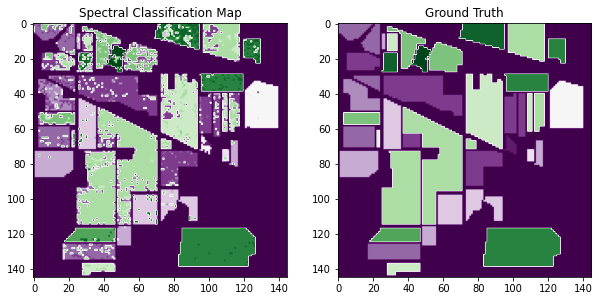

In [8]:
plt.figure(1, (10,8))
plt.subplot(1,2,1)
plt.imshow(G_svm, cmap= 'PRGn')
plt.title('Spectral Classification Map')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(G, cmap= 'PRGn')
plt.title('Ground Truth')
plt.axis('off')

In [10]:
def similarity(inpt, k, tau, mode, cval):
    '''
    Calculates the spatial nearness and spectral similarity measures
    ---------
    input parameters
    ---------
    inpt : input image (3D)
    k : kernel for convolution (2D)
    tau: smoothing parameter
    
    returns
    ------
    result: the similarity measure 
    '''
    result = (ndimage.convolve(inpt, k, mode=mode, cval=cval)**2).sum(axis = 2)
    result = np.exp(-result/2*tau**2)
    return result

def filtering(inpt, k, mode, cval):
    '''
    Filtering the input with the given filter k
    ---------
    input parameters
    ---------
    inpt : input image(3d probability map)
    k : Filter for convolution(2d) 
    
    returns
    ------
    result: Filtered output with given filter (shape = (nx, ny, n_class)) 
    '''
    result = ndimage.convolve(inpt, k, mode=mode, cval=cval)
    return result


def get_cordinate(img_shape):
    '''
    Get spatial coordinates
    ---------
    input parameters
    ---------
    img_shape : a tuple of image shape (nx, ny)
    return
    ------
    result: 3D matrix with coordinates
    '''
    nx, ny = img_shape
    result = np.meshgrid(np.arange(0, nx), np.arange(0, ny))
    return np.transpose(result)

def get_probability_map(cmap):
    '''
    One-Hot encode the classification map
    --------
    input parameters
    ----------
    cmap: 2d spectral classification map
    returns
    -------
    result: 3d binary classification map (onehot encoded) 
    '''
    n_class = len(np.unique(cmap))
    nx, ny = cmap.shape
    result = np.zeros((nx, ny, n_class))
    
    for i in range(n_class):
        result[:,:,i] = (cmap == i) 
    
    result[:,:,0] = 0
    return result

def set_background(inpt, index):
    '''
    Set background pixel values to zero
    ----------
    input parameters
    ----------
    inpt: input array
    index: index of background pixel
    
    returns
    -------
    result: array with background removed
    '''
    nx, ny, nz = inpt.shape
    func = np.vectorize(lambda x: (int(x/ny), x % ny))
    x, y = func(index)
    for i, j in zip(x,y):
        inpt[i,j,:] = 0
    return inpt

In [28]:
def spatio_spectral_learning(X, cmap, back_index, r = 3, sigma = 3, tau = 1, beta = 0.5, mode='reflect', cval=0.0):
    '''
    parameters
    ----------
    X : 3-dimensional hyperpectral image
    r : filter kernel size parameter (2r+1)x(2r+1)
    mode : Padding method{‘reflect’,’constant’,’nearest’,’mirror’, ‘wrap’}, optional
           the mode parameter determines how the array borders are handled. 
           For ‘constant’ mode, values beyond borders are set to be cval. 
           Default is ‘reflect’.
    cval : Value to fill past edges of input if mode is ‘constant’. 
           Default is 0.0
    
    returns
    -------
    result : The result of convolution of input with weights.
    
    '''
    #storing params of the function for validation
    params = {'r': r, 'sigma': sigma, 'tau': tau, 'beta': beta, 'mode': mode, 'cval': cval}
    
    #import required packages
    import time as time
    from scipy import ndimage
    import math 
    
    #shape parameters
    nx, ny, n_feature = X.shape
    n_class = len(np.unique(cmap))
    
    #create output ndarray
    result = np.zeros((nx, ny, n_class), dtype = 'float64')
    
    #kernel/filter related parameter
    kernel_side = 2*r + 1
    num_elem = kernel_side * kernel_side
    neigh_index = [i for i in range(num_elem) if i != np.floor(num_elem/2)]

    #cordinate ndarray for spatial similarity
    cord_mat = get_cordinate((nx,ny))
    
    #probability map from clasification map
    pmap = get_probability_map(cmap)
    
    
    t0 = time.time()
    for idx in neigh_index:
        #construct the respective filter of each iteration
        print('Iteration: ', idx+1, ' of ', 1+neigh_index[-1])
        t1 = time.time()
        #filter for every index( neighbourhood pixel = 1, refernce pixel = -1)
        k = np.zeros((kernel_side, kernel_side, 1)) ; 
        k[int(idx / kernel_side), idx % kernel_side,0] = 1
        k[r,r,0] = -1
        
        ##convolution with X and cord_mat to get spatial and spectral similarity
        #spectral similarity convolution
        spectral_sim = similarity(inpt = X, k = k, tau = sigma, mode = mode, cval = cval)
        #spatial similarity convolution
        spatial_sim = similarity(inpt= cord_mat, k= k, tau= tau, mode = mode, cval = cval)
        
        #probalilty map covolution
        #filter for this covolution is different fron previous(neighbourhood pixel = 1, refernce pixel = 0)
        k[r,r,0] = 0
        pmap_conv = filtering(inpt = pmap, k = k, mode = mode , cval = cval)
        
        #I_x_x convolution
        # input is a reward(1) and penalty(-1) ndarray; but filter is  
        #filter(neighbourhood pixel = 1, refernce pixel = 0)
        pmap[pmap == 0] = -1
        I_x_x_conv = filtering(inpt = pmap, k = k, mode = mode, cval = cval)
        
        #calculate final energy
        #broadcast axis_2 of spatial similarity and spectral similarity to n_class to 
        #map pmap_conv and I_x_x dimension, i.e, (nx, ny, n_class)
        sum_similarity = spectral_sim + spatial_sim
        sum_similarity = np.repeat(sum_similarity[:,:,np.newaxis], n_class, axis = 2)
        
        energy = (1 - beta)*sum_similarity*pmap_conv + beta*I_x_x_conv
        
        #sum energy of all neighbourhood pixels
        result += energy       
        t2 = time.time()
  
    t3 = time.time()   
    print('Total time', t3-t0)
    print('Average time per iteration', (t3-t0)/(num_elem - 1))
    plt.imshow(spatial_sim, cmap= 'PRGn'); 
    plt.show()
    plt.imshow(spectral_sim); plt.colorbar(); 
    plt.axis('off');
    plt.show()
    result = set_background(result, back_index)   
    return result.argmax(axis = 2), params

Iteration:  1  of  81
Iteration:  2  of  81
Iteration:  3  of  81
Iteration:  4  of  81
Iteration:  5  of  81
Iteration:  6  of  81
Iteration:  7  of  81
Iteration:  8  of  81
Iteration:  9  of  81
Iteration:  10  of  81
Iteration:  11  of  81
Iteration:  12  of  81
Iteration:  13  of  81
Iteration:  14  of  81
Iteration:  15  of  81
Iteration:  16  of  81
Iteration:  17  of  81
Iteration:  18  of  81
Iteration:  19  of  81
Iteration:  20  of  81
Iteration:  21  of  81
Iteration:  22  of  81
Iteration:  23  of  81
Iteration:  24  of  81
Iteration:  25  of  81
Iteration:  26  of  81
Iteration:  27  of  81
Iteration:  28  of  81
Iteration:  29  of  81
Iteration:  30  of  81
Iteration:  31  of  81
Iteration:  32  of  81
Iteration:  33  of  81
Iteration:  34  of  81
Iteration:  35  of  81
Iteration:  36  of  81
Iteration:  37  of  81
Iteration:  38  of  81
Iteration:  39  of  81
Iteration:  40  of  81
Iteration:  42  of  81
Iteration:  43  of  81
Iteration:  44  of  81
Iteration:  45  of  

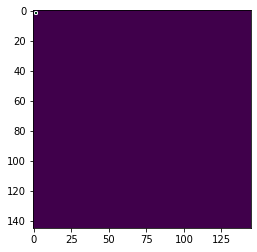

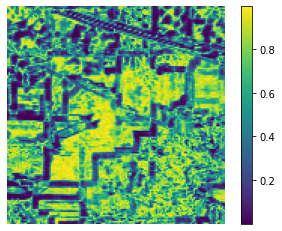

In [35]:
img, params = spatio_spectral_learning(X = I, cmap= G_svm, back_index= bckgrd_index, r = 4, tau = 4/3,sigma = 2, beta = 1.0)

In [31]:
# Back propagating the classification
#img, params = spatio_spectral_learning(X = I, cmap= img, back_index= bckgrd_index, r = 4, tau = 4/3, sigma = 2, beta = 0.1)

Text(0.5, 1.0, 'Ground Truth')

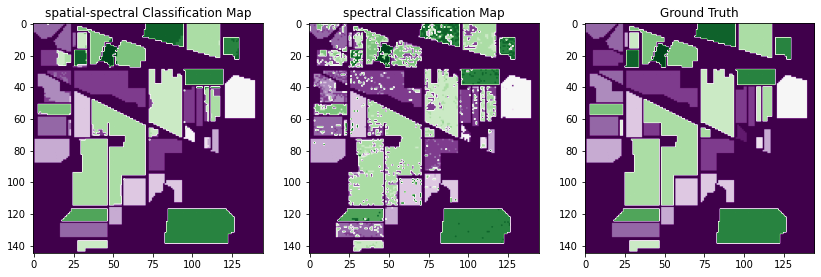

In [36]:
plt.figure(1, (14,10))
plt.subplot(1,3,1)
plt.imshow(img, cmap= 'PRGn')
plt.title('spatial-spectral Classification Map')

plt.subplot(1,3,2)
plt.imshow(G_svm, cmap= 'PRGn')
plt.title('spectral Classification Map')

plt.subplot(1,3,3)
plt.imshow(G, cmap= 'PRGn')
plt.title('Ground Truth')


In [37]:
print(classification_report(G.flatten(), img.flatten()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10776
           1       0.00      0.00      0.00        46
           2       0.89      0.90      0.90      1428
           3       0.95      0.93      0.94       830
           4       1.00      0.89      0.94       237
           5       0.95      0.96      0.95       483
           6       0.96      1.00      0.98       730
           7       1.00      0.57      0.73        28
           8       0.92      1.00      0.96       478
           9       0.00      0.00      0.00        20
          10       0.93      0.93      0.93       972
          11       0.96      0.97      0.96      2455
          12       0.99      0.97      0.98       593
          13       1.00      1.00      1.00       205
          14       0.97      0.99      0.98      1265
          15       0.95      0.89      0.92       386
          16       0.91      0.98      0.94        93

    accuracy              

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Parameter tuning

##### window size: r

In [ ]:
#validating the model on training data to determine the parameters 

from sklearn.metrics import accuracy_score, cohen_kappa_score
validation_set = validation_index
max_score = 0;
best_params = {}
R = [1,2,3,4,5,6,7,8,9,10]
Beta = [0.5]
output = np.zeros((len(R), len(Beta)))
i = 0; j = 0;
for r in R:
    
    for beta in Beta:
        
        img, params = spectral_filter(X = I, cmap= G_svm, back_index= bckgrd_index,
                                      r = r, tau = r+1/3, sigma = 2, beta = beta)
        
        val_accu = accuracy_score(y_true = y_validation, y_pred = (img.flatten())[validation_index])
        output[i,j] = val_accu
        print('validation accuracy: ', val_accu)
        if max_score < val_accu:
            max_score = val_accu
            best_params = params
        j += 1
    i +=1
    j = 0
    print('\n')
    
print("best_params", best_params)

0
time per iteration:  0.20757508277893066
1
time per iteration:  0.16661524772644043
2
time per iteration:  0.1553189754486084
3
time per iteration:  0.16212773323059082
5
time per iteration:  0.15670990943908691
6
time per iteration:  0.14555072784423828
7
time per iteration:  0.19211816787719727
8
time per iteration:  0.15126895904541016
total time 1.3393058776855469
avarage time per filter 0.16741323471069336
validation accuracy:  0.8787878787878788


0
time per iteration:  0.16238117218017578
1
time per iteration:  0.21585512161254883
2
time per iteration:  0.2629990577697754
3
time per iteration:  0.14691877365112305
4
time per iteration:  0.1485462188720703
5
time per iteration:  0.14327287673950195
6
time per iteration:  0.19596505165100098
7
time per iteration:  0.19268584251403809
8
time per iteration:  0.1477069854736328
9
time per iteration:  0.14598798751831055
10
time per iteration:  0.2461249828338623
11
time per iteration:  0.19739389419555664
13
time per iteration:  0.

time per iteration:  0.15616416931152344
19
time per iteration:  0.14858794212341309
20
time per iteration:  0.21357297897338867
21
time per iteration:  0.31377100944519043
22
time per iteration:  0.2716391086578369
23
time per iteration:  0.28122806549072266
24
time per iteration:  0.3279569149017334
25
time per iteration:  0.25087809562683105
26
time per iteration:  0.23338818550109863
27
time per iteration:  0.2195591926574707
28
time per iteration:  0.2261219024658203
29
time per iteration:  0.22749900817871094
30
time per iteration:  0.2840118408203125
31
time per iteration:  0.2584707736968994
32
time per iteration:  0.2680788040161133
33
time per iteration:  0.22683382034301758
34
time per iteration:  0.22836613655090332
35
time per iteration:  0.33362483978271484
36
time per iteration:  0.24492502212524414
37
time per iteration:  0.29195189476013184
38
time per iteration:  0.24572992324829102
39
time per iteration:  0.19192790985107422
40
time per iteration:  0.2322039604187011

time per iteration:  0.22379183769226074
85
time per iteration:  0.16108012199401855
86
time per iteration:  0.18290114402770996
87
time per iteration:  0.17398810386657715
88
time per iteration:  0.1468517780303955
89
time per iteration:  0.19928598403930664
90
time per iteration:  0.16178512573242188
91
time per iteration:  0.15546798706054688
92
time per iteration:  0.14706802368164062
93
time per iteration:  0.14485526084899902
94
time per iteration:  0.1431879997253418
95
time per iteration:  0.14032411575317383
96
time per iteration:  0.14511704444885254
97
time per iteration:  0.15788912773132324
98
time per iteration:  0.1462719440460205
99
time per iteration:  0.15117287635803223
100
time per iteration:  0.15474891662597656
101
time per iteration:  0.14636802673339844
102
time per iteration:  0.15067315101623535
103
time per iteration:  0.15493106842041016
104
time per iteration:  0.16247177124023438
105
time per iteration:  0.1630859375
106
time per iteration:  0.148389101028

time per iteration:  0.1527402400970459
101
time per iteration:  0.15577387809753418
102
time per iteration:  0.231248140335083
103
time per iteration:  0.20734000205993652
104
time per iteration:  0.19437503814697266
105
time per iteration:  0.1993391513824463
106
time per iteration:  0.19170117378234863
107
time per iteration:  0.17697691917419434
108
time per iteration:  0.1909470558166504
109
time per iteration:  0.18423914909362793
110
time per iteration:  0.18254303932189941
111
time per iteration:  0.20088696479797363
113
time per iteration:  0.15292000770568848
114
time per iteration:  0.1719050407409668
115
time per iteration:  0.22506093978881836
116
time per iteration:  0.1581571102142334
117
time per iteration:  0.15480804443359375
118
time per iteration:  0.22954177856445312
119
time per iteration:  0.222747802734375
120
time per iteration:  0.2273271083831787
121
time per iteration:  0.21469378471374512
122
time per iteration:  0.16101598739624023
123
time per iteration: 

time per iteration:  0.21629071235656738
60
time per iteration:  0.20368409156799316
61
time per iteration:  0.2137000560760498
62
time per iteration:  0.19737696647644043
63
time per iteration:  0.20839214324951172
64
time per iteration:  0.20825600624084473
65
time per iteration:  0.18380999565124512
66
time per iteration:  0.18837189674377441
67
time per iteration:  0.21672439575195312
68
time per iteration:  0.2055349349975586
69
time per iteration:  0.2069408893585205
70
time per iteration:  0.21395397186279297
71
time per iteration:  0.2020730972290039
72
time per iteration:  0.2022690773010254
73
time per iteration:  0.18618083000183105
74
time per iteration:  0.16127705574035645
75
time per iteration:  0.16085314750671387
76
time per iteration:  0.1842329502105713
77
time per iteration:  0.17345309257507324
78
time per iteration:  0.16311979293823242
79
time per iteration:  0.20427799224853516
80
time per iteration:  0.21731185913085938
81
time per iteration:  0.208760023117065

time per iteration:  0.18179106712341309
247
time per iteration:  0.17026615142822266
248
time per iteration:  0.17440581321716309
249
time per iteration:  0.1717851161956787
250
time per iteration:  0.17299294471740723
251
time per iteration:  0.17251992225646973
252
time per iteration:  0.1741960048675537
253
time per iteration:  0.171461820602417
254
time per iteration:  0.17588591575622559
255
time per iteration:  0.17289996147155762
256
time per iteration:  0.17295002937316895
257
time per iteration:  0.16988587379455566
258
time per iteration:  0.1714310646057129
259
time per iteration:  0.16690516471862793
260
time per iteration:  0.17088007926940918
261
time per iteration:  0.16742300987243652
262
time per iteration:  0.16489696502685547
263
time per iteration:  0.18080902099609375
264
time per iteration:  0.17860102653503418
265
time per iteration:  0.17496085166931152
266
time per iteration:  0.17729902267456055
267
time per iteration:  0.1751117706298828
268
time per iterati

time per iteration:  0.15178608894348145
142
time per iteration:  0.1668868064880371
143
time per iteration:  0.14785003662109375
144
time per iteration:  0.1531989574432373
145
time per iteration:  0.15009689331054688
146
time per iteration:  0.15445613861083984
147
time per iteration:  0.15726876258850098
148
time per iteration:  0.16937613487243652
149
time per iteration:  0.16369009017944336
150
time per iteration:  0.15886378288269043
151
time per iteration:  0.16193604469299316
152
time per iteration:  0.15713882446289062
153
time per iteration:  0.15807604789733887
154
time per iteration:  0.1569960117340088
155
time per iteration:  0.15714001655578613
156
time per iteration:  0.1541588306427002
157
time per iteration:  0.15476298332214355
158
time per iteration:  0.15466523170471191
159
time per iteration:  0.19566106796264648
160
time per iteration:  0.1894216537475586
161
time per iteration:  0.17780208587646484
162
time per iteration:  0.1419517993927002
163
time per iterati

time per iteration:  0.17605018615722656
327
time per iteration:  0.1755540370941162
328
time per iteration:  0.17415404319763184
329
time per iteration:  0.17032408714294434
330
time per iteration:  0.17297101020812988
331
time per iteration:  0.1719810962677002
332
time per iteration:  0.18302488327026367
333
time per iteration:  0.17403411865234375
334
time per iteration:  0.17699003219604492
335
time per iteration:  0.17502999305725098
336
time per iteration:  0.17676424980163574
337
time per iteration:  0.17900896072387695
338
time per iteration:  0.1796863079071045
339
time per iteration:  0.17827892303466797
340
time per iteration:  0.17760729789733887
341
time per iteration:  0.17670488357543945
342
time per iteration:  0.1788938045501709
343
time per iteration:  0.17991900444030762
344
time per iteration:  0.19426798820495605
345
time per iteration:  0.17620468139648438
346
time per iteration:  0.18081426620483398
347
time per iteration:  0.1744072437286377
348
time per iterat

time per iteration:  0.18619108200073242
151
time per iteration:  0.2768383026123047
152
time per iteration:  0.20629096031188965
153
time per iteration:  0.22786688804626465
154
time per iteration:  0.20888805389404297
155
time per iteration:  0.1855769157409668
156
time per iteration:  0.17374897003173828
157
time per iteration:  0.17134594917297363
158
time per iteration:  0.1565849781036377
159
time per iteration:  0.15633821487426758
160
time per iteration:  0.18611788749694824
161
time per iteration:  0.22365689277648926
162
time per iteration:  0.16949987411499023
163
time per iteration:  0.24662995338439941
164
time per iteration:  0.22247910499572754
165
time per iteration:  0.1943831443786621
166
time per iteration:  0.19126391410827637
167
time per iteration:  0.203355073928833
168
time per iteration:  0.2001490592956543
169
time per iteration:  0.1710352897644043
170
time per iteration:  0.20552611351013184
171
time per iteration:  0.1628880500793457
172
time per iteration:

time per iteration:  0.25862765312194824
336
time per iteration:  0.19984722137451172
337
time per iteration:  0.25028395652770996
338
time per iteration:  0.22056293487548828
339
time per iteration:  0.2929720878601074
340
time per iteration:  0.1786801815032959
341
time per iteration:  0.16952800750732422
342
time per iteration:  0.16608786582946777
343
time per iteration:  0.1910109519958496
344
time per iteration:  0.18985915184020996
345
time per iteration:  0.16522002220153809
346
time per iteration:  0.17776703834533691
347
time per iteration:  0.17396211624145508
348
time per iteration:  0.1727919578552246
349
time per iteration:  0.17808938026428223
350
time per iteration:  0.17282581329345703
351
time per iteration:  0.17705082893371582
352
time per iteration:  0.17221283912658691
353
time per iteration:  0.17680907249450684
354
time per iteration:  0.1746981143951416
355
time per iteration:  0.1937100887298584
356
time per iteration:  0.17633819580078125
357
time per iterati

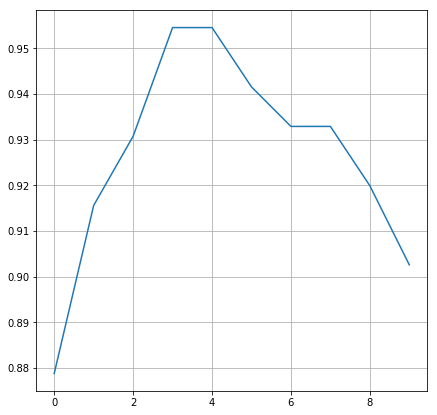

In [ ]:
plt.figure(1, (7,7))
plt.plot(output)
plt.grid()

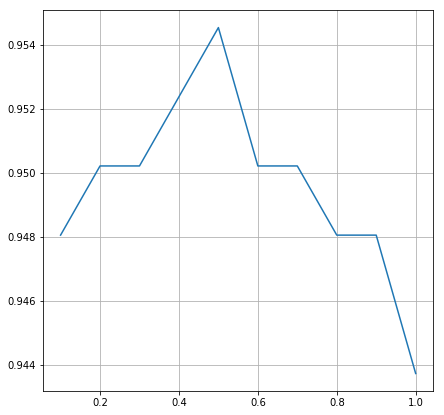

In [ ]:
plt.figure(1, (7,7))
plt.plot(Beta, output.sum(axis = 0))
plt.grid()

In [ ]:
#validating the model on training data to determine the parameters 
from sklearn.metrics import accuracy_score
validation_set = validation_index
max_score = 0;
best_params = {}
fig = plt.figure(1, (7,7))
#R = [1,2,3,4,5,6,7,8,9,10]
R = [3, 4, 5]
Tau = [1, 2,3,4,5,6,7,8,9,10]
#Beta = [0.4]
output = np.zeros((len(R), len(Beta)))
i = 0; j = 0;
for r in R:
    
    for tau in Tau:
        
        
        
        img, params = spectral_filter(X = I, cmap= G_svm, back_index= bckgrd_index,
                                      r = r, tau = tau, sigma = 2, beta = 0.5)
        
        val_accu = accuracy_score(y_true = y_validation, y_pred = (img.flatten())[validation_index])
        output[i,j] = val_accu
        print('validation accuracy: ', val_accu)
        if max_score < val_accu:
            max_score = val_accu
            best_params = params
        j += 1
    i +=1
    j = 0
    print('\n')
    
print("best_params", best_params)

0
time per iteration:  0.1963787078857422
1
time per iteration:  0.17320609092712402
2
time per iteration:  0.157243013381958
3
time per iteration:  0.19300198554992676
4
time per iteration:  0.16907596588134766
5
time per iteration:  0.19129490852355957
6
time per iteration:  0.1730201244354248
7
time per iteration:  0.1664903163909912
8
time per iteration:  0.18143582344055176
9
time per iteration:  0.19809508323669434
10
time per iteration:  0.22822189331054688
11
time per iteration:  0.16884970664978027
12
time per iteration:  0.16727900505065918
13
time per iteration:  0.20604395866394043
14
time per iteration:  0.1688060760498047
15
time per iteration:  0.160660982131958
16
time per iteration:  0.17840313911437988
17
time per iteration:  0.1699810028076172
18
time per iteration:  0.15886306762695312
19
time per iteration:  0.16332578659057617
20
time per iteration:  0.16710615158081055
21
time per iteration:  0.1595458984375
22
time per iteration:  0.15200304985046387
23
time per

time per iteration:  0.17455530166625977
39
time per iteration:  0.15862703323364258
40
time per iteration:  0.1712021827697754
41
time per iteration:  0.1893599033355713
42
time per iteration:  0.2560579776763916
43
time per iteration:  0.25659799575805664
44
time per iteration:  0.1980292797088623
45
time per iteration:  0.1768479347229004
46
time per iteration:  0.16382312774658203
47
time per iteration:  0.1821608543395996
48
time per iteration:  0.18180108070373535
total time 8.518669843673706
avarage time per filter 0.17747228840986887
validation accuracy:  0.9307359307359307
0
time per iteration:  0.19169998168945312
1
time per iteration:  0.19149374961853027
2
time per iteration:  0.18422198295593262
3
time per iteration:  0.17514586448669434
4
time per iteration:  0.16061902046203613
5
time per iteration:  0.2508370876312256
6
time per iteration:  0.26525211334228516
7
time per iteration:  0.24544119834899902
8
time per iteration:  0.22186613082885742
9
time per iteration:  0.

time per iteration:  0.15575194358825684
25
time per iteration:  0.15149307250976562
26
time per iteration:  0.15643787384033203
27
time per iteration:  0.15616989135742188
28
time per iteration:  0.15834712982177734
29
time per iteration:  0.15704011917114258
30
time per iteration:  0.15284085273742676
31
time per iteration:  0.17044782638549805
32
time per iteration:  0.15907716751098633
33
time per iteration:  0.15705108642578125
34
time per iteration:  0.16331982612609863
35
time per iteration:  0.1576371192932129
36
time per iteration:  0.1603689193725586
37
time per iteration:  0.1562509536743164
38
time per iteration:  0.1779031753540039
39
time per iteration:  0.15486717224121094
40
time per iteration:  0.16660594940185547
41
time per iteration:  0.16634869575500488
42
time per iteration:  0.16092514991760254
43
time per iteration:  0.16525626182556152
44
time per iteration:  0.15939116477966309
45
time per iteration:  0.1734778881072998
46
time per iteration:  0.16784882545471

time per iteration:  0.16550397872924805
62
time per iteration:  0.18279814720153809
63
time per iteration:  0.19538593292236328
64
time per iteration:  0.17537307739257812
65
time per iteration:  0.18579626083374023
66
time per iteration:  0.16863203048706055
67
time per iteration:  0.2210240364074707
68
time per iteration:  0.20662283897399902
69
time per iteration:  0.18520903587341309
70
time per iteration:  0.20168495178222656
71
time per iteration:  0.23632097244262695
72
time per iteration:  0.2018110752105713
73
time per iteration:  0.215162992477417
74
time per iteration:  0.30439186096191406
75
time per iteration:  0.2924690246582031
76
time per iteration:  0.24518609046936035
77
time per iteration:  0.21371984481811523
78
time per iteration:  0.22211599349975586
79
time per iteration:  0.19990086555480957
80
time per iteration:  0.22788381576538086
total time 14.778779983520508
avarage time per filter 0.18473474979400634
validation accuracy:  0.9523809523809523
0
time per it

time per iteration:  0.17838191986083984
3
time per iteration:  0.1704089641571045
4
time per iteration:  0.18229103088378906
5
time per iteration:  0.16451716423034668
6
time per iteration:  0.16951394081115723
7
time per iteration:  0.16875600814819336
8
time per iteration:  0.17049217224121094
9
time per iteration:  0.17153215408325195
10
time per iteration:  0.18174076080322266
11
time per iteration:  0.16504979133605957
12
time per iteration:  0.1694929599761963
13
time per iteration:  0.17879915237426758
14
time per iteration:  0.17515802383422852
15
time per iteration:  0.16515469551086426
16
time per iteration:  0.16705584526062012
17
time per iteration:  0.16425776481628418
18
time per iteration:  0.16942167282104492
19
time per iteration:  0.16951608657836914
20
time per iteration:  0.16755199432373047
21
time per iteration:  0.16004300117492676
22
time per iteration:  0.1816558837890625
23
time per iteration:  0.16824698448181152
24
time per iteration:  0.1616840362548828
25

time per iteration:  0.1695098876953125
27
time per iteration:  0.16512513160705566
28
time per iteration:  0.16632509231567383
29
time per iteration:  0.16284608840942383
30
time per iteration:  0.16081595420837402
31
time per iteration:  0.17221307754516602
32
time per iteration:  0.16344690322875977
33
time per iteration:  0.15705323219299316
34
time per iteration:  0.16498708724975586
35
time per iteration:  0.16358089447021484
36
time per iteration:  0.1616959571838379
37
time per iteration:  0.1643848419189453
38
time per iteration:  0.15950512886047363
39
time per iteration:  0.1509561538696289
41
time per iteration:  0.16082096099853516
42
time per iteration:  0.15622305870056152
43
time per iteration:  0.15933680534362793
44
time per iteration:  0.1641230583190918
45
time per iteration:  0.17608404159545898
46
time per iteration:  0.16169500350952148
47
time per iteration:  0.16691207885742188
48
time per iteration:  0.1537458896636963
49
time per iteration:  0.175193786621093

time per iteration:  0.17760920524597168
52
time per iteration:  0.1702899932861328
53
time per iteration:  0.1699049472808838
54
time per iteration:  0.16612505912780762
55
time per iteration:  0.16891813278198242
56
time per iteration:  0.2013413906097412
57
time per iteration:  0.20675086975097656
58
time per iteration:  0.17972517013549805
59
time per iteration:  0.16853618621826172
60
time per iteration:  0.1652679443359375
61
time per iteration:  0.17282772064208984
62
time per iteration:  0.17133593559265137
63
time per iteration:  0.17349505424499512
64
time per iteration:  0.16499114036560059
65
time per iteration:  0.1639080047607422
66
time per iteration:  0.1606919765472412
67
time per iteration:  0.18427491188049316
68
time per iteration:  0.17158889770507812
69
time per iteration:  0.1774280071258545
70
time per iteration:  0.22593283653259277
71
time per iteration:  0.2155461311340332
72
time per iteration:  0.227003812789917
73
time per iteration:  0.20836114883422852
7

time per iteration:  0.16917705535888672
75
time per iteration:  0.16326141357421875
76
time per iteration:  0.17894816398620605
77
time per iteration:  0.17126703262329102
78
time per iteration:  0.17598676681518555
79
time per iteration:  0.1728212833404541
80
time per iteration:  0.1742088794708252
total time 14.719355821609497
avarage time per filter 0.1839919477701187
validation accuracy:  0.9545454545454546


0
time per iteration:  0.21579813957214355
1
time per iteration:  0.1826310157775879
2
time per iteration:  0.19014692306518555
3
time per iteration:  0.17999505996704102
4
time per iteration:  0.18541288375854492
5
time per iteration:  0.18301081657409668
6
time per iteration:  0.18010210990905762
7
time per iteration:  0.16953206062316895
8
time per iteration:  0.17392373085021973
9
time per iteration:  0.1761610507965088
10
time per iteration:  0.18115711212158203
11
time per iteration:  0.1737968921661377
12
time per iteration:  0.17848610877990723
13
time per iteration:

time per iteration:  0.15600800514221191
58
time per iteration:  0.15486788749694824
59
time per iteration:  0.1665968894958496
61
time per iteration:  0.1565549373626709
62
time per iteration:  0.18385100364685059
63
time per iteration:  0.1648268699645996
64
time per iteration:  0.17636895179748535
65
time per iteration:  0.17142295837402344
66
time per iteration:  0.1913750171661377
67
time per iteration:  0.1626729965209961
68
time per iteration:  0.16532683372497559
69
time per iteration:  0.15702414512634277
70
time per iteration:  0.1603529453277588
71
time per iteration:  0.1718919277191162
72
time per iteration:  0.16178274154663086
73
time per iteration:  0.1652369499206543
74
time per iteration:  0.1638810634613037
75
time per iteration:  0.16703224182128906
76
time per iteration:  0.16649699211120605
77
time per iteration:  0.1663351058959961
78
time per iteration:  0.17089509963989258
79
time per iteration:  0.16661906242370605
80
time per iteration:  0.16250991821289062
8

0
time per iteration:  0.18382596969604492
1
time per iteration:  0.18093013763427734
2
time per iteration:  0.1799168586730957
3
time per iteration:  0.18218708038330078
4
time per iteration:  0.18385791778564453
5
time per iteration:  0.1905369758605957
6
time per iteration:  0.17072224617004395
7
time per iteration:  0.17391705513000488
8
time per iteration:  0.17126107215881348
9
time per iteration:  0.17689800262451172
10
time per iteration:  0.1831669807434082
11
time per iteration:  0.17903375625610352
12
time per iteration:  0.17380475997924805
13
time per iteration:  0.17821025848388672
14
time per iteration:  0.1745460033416748
15
time per iteration:  0.17583298683166504
16
time per iteration:  0.18584108352661133
17
time per iteration:  0.17457890510559082
18
time per iteration:  0.1664581298828125
19
time per iteration:  0.16873717308044434
20
time per iteration:  0.16585779190063477
21
time per iteration:  0.17553210258483887
22
time per iteration:  0.1760871410369873
23
t

time per iteration:  0.19827675819396973
67
time per iteration:  0.17460179328918457
68
time per iteration:  0.16878533363342285
69
time per iteration:  0.15775418281555176
70
time per iteration:  0.16158533096313477
71
time per iteration:  0.17490386962890625
72
time per iteration:  0.16195392608642578
73
time per iteration:  0.17485308647155762
74
time per iteration:  0.16514372825622559
75
time per iteration:  0.16827702522277832
76
time per iteration:  0.18966197967529297
77
time per iteration:  0.16773128509521484
78
time per iteration:  0.17549705505371094
79
time per iteration:  0.16765499114990234
80
time per iteration:  0.16178393363952637
81
time per iteration:  0.15984702110290527
82
time per iteration:  0.18005681037902832
83
time per iteration:  0.17518281936645508
84
time per iteration:  0.17404913902282715
85
time per iteration:  0.17213892936706543
86
time per iteration:  0.1739809513092041
87
time per iteration:  0.16858696937561035
88
time per iteration:  0.1766362190

time per iteration:  0.17557096481323242
8
time per iteration:  0.172529935836792
9
time per iteration:  0.17711806297302246
10
time per iteration:  0.17717719078063965
11
time per iteration:  0.18116092681884766
12
time per iteration:  0.1750802993774414
13
time per iteration:  0.19244694709777832
14
time per iteration:  0.1762709617614746
15
time per iteration:  0.1820988655090332
16
time per iteration:  0.18466615676879883
17
time per iteration:  0.1733689308166504
18
time per iteration:  0.16925501823425293
19
time per iteration:  0.17267394065856934
20
time per iteration:  0.16928982734680176
21
time per iteration:  0.18290281295776367
22
time per iteration:  0.17300081253051758
23
time per iteration:  0.17616581916809082
24
time per iteration:  0.1723158359527588
25
time per iteration:  0.17301297187805176
26
time per iteration:  0.1751251220703125
27
time per iteration:  0.19301915168762207
28
time per iteration:  0.16149401664733887
29
time per iteration:  0.16860508918762207
3

time per iteration:  0.16568803787231445
74
time per iteration:  0.16712403297424316
75
time per iteration:  0.17033696174621582
76
time per iteration:  0.16764283180236816
77
time per iteration:  0.1856827735900879
78
time per iteration:  0.16788911819458008
79
time per iteration:  0.16295766830444336
80
time per iteration:  0.16225290298461914
81
time per iteration:  0.16747593879699707
82
time per iteration:  0.17780709266662598
83
time per iteration:  0.17467975616455078
84
time per iteration:  0.1693401336669922
85
time per iteration:  0.17238402366638184
86
time per iteration:  0.16897916793823242
87
time per iteration:  0.17218804359436035
88
time per iteration:  0.17452311515808105
89
time per iteration:  0.1710519790649414
90
time per iteration:  0.16607928276062012
91
time per iteration:  0.16606402397155762
92
time per iteration:  0.15764713287353516
93
time per iteration:  0.1912519931793213
94
time per iteration:  0.16498994827270508
95
time per iteration:  0.1821780204772

time per iteration:  0.1825871467590332
16
time per iteration:  0.18452811241149902
17
time per iteration:  0.17212200164794922
18
time per iteration:  0.16579890251159668
19
time per iteration:  0.17254996299743652
20
time per iteration:  0.1708979606628418
21
time per iteration:  0.1755990982055664
22
time per iteration:  0.1709580421447754
23
time per iteration:  0.1781160831451416
24
time per iteration:  0.17309093475341797
25
time per iteration:  0.17811822891235352
26
time per iteration:  0.1785752773284912
27
time per iteration:  0.1862320899963379
28
time per iteration:  0.15937328338623047
29
time per iteration:  0.1727280616760254
30
time per iteration:  0.16227006912231445
31
time per iteration:  0.1719820499420166
32
time per iteration:  0.1759779453277588
33
time per iteration:  0.17892193794250488
34
time per iteration:  0.19846391677856445
35
time per iteration:  0.20669889450073242
36
time per iteration:  0.18190908432006836
37
time per iteration:  0.17917108535766602
3

<Figure size 504x504 with 0 Axes>

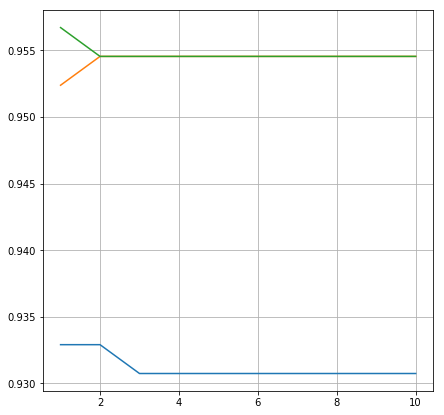

In [ ]:
plt.figure(1, (7,7))
plt.plot(Tau,output[0,:], Tau, output[1,:], Tau, output[2,:])
plt.grid()

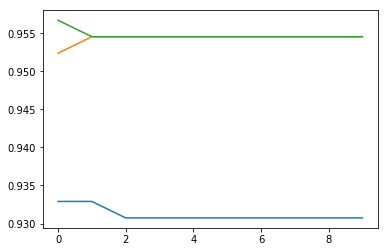

In [ ]:
plt.plot(output.T)

In [ ]:
#validating the model on training data to determine the parameters 
from sklearn.metrics import accuracy_score
validation_set = validation_index
max_score = 0;
best_params = {}
fig = plt.figure(1, (7,7))
#R = [1,2,3,4,5,6,7,8,9,10]
R = [ 2,4,6,8]
sigma = [1, 2,3,4,5,6,7,8,9,10]
#Beta = [0.4]
output = np.zeros((len(R), len(Beta)))
i = 0; j = 0;
for r in R:
    
    for sig in sigma:
        
        
        
        img, params = spectral_filter(X = I, cmap= G_svm, back_index= bckgrd_index,
                                      r = r, tau = r+1/3, sigma = sig, beta = 0.5)
        
        val_accu = accuracy_score(y_true = y_validation, y_pred = (img.flatten())[validation_index])
        output[i,j] = val_accu
        print('validation accuracy: ', val_accu)
        if max_score < val_accu:
            max_score = val_accu
            best_params = params
        j += 1
    i +=1
    j = 0
    print('\n')
    
print("best_params", best_params)

0
time per iteration:  0.21357989311218262
1
time per iteration:  0.16509675979614258
2
time per iteration:  0.17461705207824707
3
time per iteration:  0.17955803871154785
4
time per iteration:  0.17955708503723145
5
time per iteration:  0.18370795249938965
6
time per iteration:  0.19925999641418457
7
time per iteration:  0.19589519500732422
8
time per iteration:  0.17555022239685059
9
time per iteration:  0.18471717834472656
10
time per iteration:  0.1743628978729248
11
time per iteration:  0.15913891792297363
13
time per iteration:  0.17396306991577148
14
time per iteration:  0.21915102005004883
15
time per iteration:  0.1717090606689453
16
time per iteration:  0.26029086112976074
17
time per iteration:  0.2084801197052002
18
time per iteration:  0.19384407997131348
19
time per iteration:  0.19905805587768555
20
time per iteration:  0.2294473648071289
21
time per iteration:  0.26189589500427246
22
time per iteration:  0.26955389976501465
23
time per iteration:  0.22476887702941895
24

time per iteration:  0.18672513961791992
5
time per iteration:  0.1788501739501953
6
time per iteration:  0.18251895904541016
7
time per iteration:  0.1917259693145752
8
time per iteration:  0.18071484565734863
9
time per iteration:  0.18070721626281738
10
time per iteration:  0.17995214462280273
11
time per iteration:  0.1862170696258545
13
time per iteration:  0.2657637596130371
14
time per iteration:  0.19861984252929688
15
time per iteration:  0.1850721836090088
16
time per iteration:  0.1822671890258789
17
time per iteration:  0.19943761825561523
18
time per iteration:  0.17679595947265625
19
time per iteration:  0.18432378768920898
20
time per iteration:  0.20019197463989258
21
time per iteration:  0.1888141632080078
22
time per iteration:  0.20437002182006836
23
time per iteration:  0.18911004066467285
24
time per iteration:  0.19040465354919434
total time 4.6228790283203125
avarage time per filter 0.19261995951334634
validation accuracy:  0.9177489177489178
0
time per iteration

time per iteration:  0.20812392234802246
31
time per iteration:  0.2063426971435547
32
time per iteration:  0.16317510604858398
33
time per iteration:  0.18044805526733398
34
time per iteration:  0.20390081405639648
35
time per iteration:  0.2575709819793701
36
time per iteration:  0.18134212493896484
37
time per iteration:  0.18080902099609375
38
time per iteration:  0.176832914352417
39
time per iteration:  0.17906618118286133
41
time per iteration:  0.17332983016967773
42
time per iteration:  0.17944002151489258
43
time per iteration:  0.17614412307739258
44
time per iteration:  0.1849367618560791
45
time per iteration:  0.1804211139678955
46
time per iteration:  0.233320951461792
47
time per iteration:  0.17936277389526367
48
time per iteration:  0.18279099464416504
49
time per iteration:  0.18992900848388672
50
time per iteration:  0.18197393417358398
51
time per iteration:  0.1883680820465088
52
time per iteration:  0.24757695198059082
53
time per iteration:  0.21329712867736816


time per iteration:  0.18931794166564941
56
time per iteration:  0.18878793716430664
57
time per iteration:  0.23541712760925293
58
time per iteration:  0.1979207992553711
59
time per iteration:  0.22574591636657715
60
time per iteration:  0.20063114166259766
61
time per iteration:  0.2012472152709961
62
time per iteration:  0.19738221168518066
63
time per iteration:  0.1999821662902832
64
time per iteration:  0.22027802467346191
65
time per iteration:  0.21179604530334473
66
time per iteration:  0.20135712623596191
67
time per iteration:  0.2326967716217041
68
time per iteration:  0.19206619262695312
69
time per iteration:  0.24159884452819824
70
time per iteration:  0.2046968936920166
71
time per iteration:  0.21548223495483398
72
time per iteration:  0.19129586219787598
73
time per iteration:  0.21864819526672363
74
time per iteration:  0.20682001113891602
75
time per iteration:  0.26000189781188965
76
time per iteration:  0.27051591873168945
77
time per iteration:  0.20294880867004

time per iteration:  0.17006373405456543
79
time per iteration:  0.1666111946105957
80
time per iteration:  0.1815030574798584
total time 14.631950855255127
avarage time per filter 0.1828993856906891
validation accuracy:  0.9523809523809523
0
time per iteration:  0.19137096405029297
1
time per iteration:  0.1715250015258789
2
time per iteration:  0.16995811462402344
3
time per iteration:  0.16289520263671875
4
time per iteration:  0.17667603492736816
5
time per iteration:  0.15773892402648926
6
time per iteration:  0.16307306289672852
7
time per iteration:  0.15436792373657227
8
time per iteration:  0.16338825225830078
9
time per iteration:  0.1663360595703125
10
time per iteration:  0.1691579818725586
11
time per iteration:  0.16589593887329102
12
time per iteration:  0.16427326202392578
13
time per iteration:  0.16912007331848145
14
time per iteration:  0.1577908992767334
15
time per iteration:  0.1518840789794922
16
time per iteration:  0.15881967544555664
17
time per iteration:  0.

time per iteration:  0.1627500057220459
19
time per iteration:  0.16037893295288086
20
time per iteration:  0.16652393341064453
21
time per iteration:  0.15072393417358398
22
time per iteration:  0.1749739646911621
23
time per iteration:  0.14553213119506836
24
time per iteration:  0.15334105491638184
25
time per iteration:  0.15247106552124023
26
time per iteration:  0.16232967376708984
27
time per iteration:  0.1591172218322754
28
time per iteration:  0.1596238613128662
29
time per iteration:  0.15279912948608398
30
time per iteration:  0.1530601978302002
31
time per iteration:  0.16407394409179688
32
time per iteration:  0.15662813186645508
33
time per iteration:  0.15190505981445312
34
time per iteration:  0.15676307678222656
35
time per iteration:  0.15376925468444824
36
time per iteration:  0.15576982498168945
37
time per iteration:  0.14262008666992188
38
time per iteration:  0.15121698379516602
39
time per iteration:  0.1426377296447754
41
time per iteration:  0.147334814071655

time per iteration:  0.16418886184692383
43
time per iteration:  0.1602640151977539
44
time per iteration:  0.1643061637878418
45
time per iteration:  0.17043209075927734
46
time per iteration:  0.15659713745117188
47
time per iteration:  0.15372705459594727
48
time per iteration:  0.1582651138305664
49
time per iteration:  0.15252399444580078
50
time per iteration:  0.16655993461608887
51
time per iteration:  0.16390180587768555
52
time per iteration:  0.17198991775512695
53
time per iteration:  0.16404294967651367
54
time per iteration:  0.16751313209533691
55
time per iteration:  0.15991592407226562
56
time per iteration:  0.16602182388305664
57
time per iteration:  0.1571061611175537
58
time per iteration:  0.18077707290649414
59
time per iteration:  0.15238499641418457
60
time per iteration:  0.16080594062805176
61
time per iteration:  0.1541910171508789
62
time per iteration:  0.15943193435668945
63
time per iteration:  0.16819405555725098
64
time per iteration:  0.16343903541564

time per iteration:  0.1739368438720703
59
time per iteration:  0.14986705780029297
60
time per iteration:  0.15467596054077148
61
time per iteration:  0.15417885780334473
62
time per iteration:  0.16324305534362793
63
time per iteration:  0.15742802619934082
64
time per iteration:  0.16438984870910645
65
time per iteration:  0.15742802619934082
66
time per iteration:  0.1588139533996582
67
time per iteration:  0.15536999702453613
68
time per iteration:  0.1566181182861328
69
time per iteration:  0.1510939598083496
70
time per iteration:  0.15053319931030273
71
time per iteration:  0.16261911392211914
72
time per iteration:  0.15090703964233398
73
time per iteration:  0.15084314346313477
74
time per iteration:  0.15244412422180176
75
time per iteration:  0.1587660312652588
76
time per iteration:  0.16384410858154297
77
time per iteration:  0.15463900566101074
78
time per iteration:  0.15573596954345703
79
time per iteration:  0.14603233337402344
80
time per iteration:  0.15177178382873

time per iteration:  0.17881083488464355
75
time per iteration:  0.16851401329040527
76
time per iteration:  0.16090106964111328
77
time per iteration:  0.16290521621704102
78
time per iteration:  0.16640114784240723
79
time per iteration:  0.14831781387329102
80
time per iteration:  0.15299606323242188
81
time per iteration:  0.1478431224822998
82
time per iteration:  0.15174388885498047
83
time per iteration:  0.14628195762634277
85
time per iteration:  0.14948415756225586
86
time per iteration:  0.14765095710754395
87
time per iteration:  0.15243887901306152
88
time per iteration:  0.1468830108642578
89
time per iteration:  0.15752601623535156
90
time per iteration:  0.15747809410095215
91
time per iteration:  0.1651017665863037
92
time per iteration:  0.15370392799377441
93
time per iteration:  0.15559172630310059
94
time per iteration:  0.1509559154510498
95
time per iteration:  0.1546480655670166
96
time per iteration:  0.14791202545166016
97
time per iteration:  0.16828417778015

time per iteration:  0.1570911407470703
93
time per iteration:  0.15331315994262695
94
time per iteration:  0.15218472480773926
95
time per iteration:  0.14502501487731934
96
time per iteration:  0.1535940170288086
97
time per iteration:  0.1620500087738037
98
time per iteration:  0.17353081703186035
99
time per iteration:  0.15186190605163574
100
time per iteration:  0.1641688346862793
101
time per iteration:  0.15364480018615723
102
time per iteration:  0.15920734405517578
103
time per iteration:  0.1636650562286377
104
time per iteration:  0.16510725021362305
105
time per iteration:  0.15355801582336426
106
time per iteration:  0.16680431365966797
107
time per iteration:  0.15685081481933594
108
time per iteration:  0.15791678428649902
109
time per iteration:  0.14847803115844727
110
time per iteration:  0.17486906051635742
111
time per iteration:  0.15087413787841797
112
time per iteration:  0.1658942699432373
113
time per iteration:  0.15852689743041992
114
time per iteration:  0.

time per iteration:  0.1558539867401123
109
time per iteration:  0.14740204811096191
110
time per iteration:  0.1741011142730713
111
time per iteration:  0.1519317626953125
112
time per iteration:  0.15923571586608887
113
time per iteration:  0.16093993186950684
114
time per iteration:  0.16400408744812012
115
time per iteration:  0.16259503364562988
116
time per iteration:  0.16762804985046387
117
time per iteration:  0.16225099563598633
118
time per iteration:  0.16759181022644043
119
time per iteration:  0.1569819450378418
120
time per iteration:  0.16423869132995605
121
time per iteration:  0.15274691581726074
122
time per iteration:  0.1563429832458496
123
time per iteration:  0.16848421096801758
124
time per iteration:  0.16113686561584473
125
time per iteration:  0.16600608825683594
126
time per iteration:  0.17067408561706543
127
time per iteration:  0.16504287719726562
128
time per iteration:  0.1690201759338379
129
time per iteration:  0.1638782024383545
130
time per iteratio

time per iteration:  0.16926002502441406
126
time per iteration:  0.1619257926940918
127
time per iteration:  0.16790318489074707
128
time per iteration:  0.16726303100585938
129
time per iteration:  0.17197799682617188
130
time per iteration:  0.16892385482788086
131
time per iteration:  0.1716470718383789
132
time per iteration:  0.1592390537261963
133
time per iteration:  0.1666429042816162
134
time per iteration:  0.1539287567138672
135
time per iteration:  0.16834712028503418
136
time per iteration:  0.1724531650543213
137
time per iteration:  0.16973018646240234
138
time per iteration:  0.16655492782592773
139
time per iteration:  0.16957974433898926
140
time per iteration:  0.16931676864624023
141
time per iteration:  0.17574381828308105
142
time per iteration:  0.1674802303314209
143
time per iteration:  0.17409205436706543
144
time per iteration:  0.172698974609375
145
time per iteration:  0.1680741310119629
146
time per iteration:  0.1602020263671875
147
time per iteration:  

time per iteration:  0.1738297939300537
142
time per iteration:  0.16829371452331543
143
time per iteration:  0.17099595069885254
144
time per iteration:  0.16837191581726074
145
time per iteration:  0.16784214973449707
146
time per iteration:  0.16037201881408691
147
time per iteration:  0.1669299602508545
148
time per iteration:  0.16110467910766602
149
time per iteration:  0.17638087272644043
150
time per iteration:  0.17058992385864258
151
time per iteration:  0.17627811431884766
152
time per iteration:  0.17216897010803223
153
time per iteration:  0.17544102668762207
154
time per iteration:  0.1720130443572998
155
time per iteration:  0.17427802085876465
156
time per iteration:  0.16755390167236328
157
time per iteration:  0.1820659637451172
158
time per iteration:  0.16798996925354004
159
time per iteration:  0.1734788417816162
160
time per iteration:  0.16825294494628906
161
time per iteration:  0.168687105178833
162
time per iteration:  0.18094205856323242
163
time per iteratio

time per iteration:  0.17593693733215332
158
time per iteration:  0.16576719284057617
159
time per iteration:  0.1709451675415039
160
time per iteration:  0.1674649715423584
161
time per iteration:  0.1688380241394043
162
time per iteration:  0.1796398162841797
163
time per iteration:  0.17878293991088867
164
time per iteration:  0.17949223518371582
165
time per iteration:  0.1801619529724121
166
time per iteration:  0.17404508590698242
167
time per iteration:  0.1809990406036377
168
time per iteration:  0.1716749668121338
total time 27.72961187362671
avarage time per filter 0.16505721353349231
validation accuracy:  0.9415584415584416
0
time per iteration:  0.20104384422302246
1
time per iteration:  0.1736760139465332
2
time per iteration:  0.1741929054260254
3
time per iteration:  0.1757068634033203
4
time per iteration:  0.17601513862609863
5
time per iteration:  0.1767878532409668
6
time per iteration:  0.17899584770202637
7
time per iteration:  0.16150188446044922
8
time per iterat

time per iteration:  0.17486906051635742
3
time per iteration:  0.17406320571899414
4
time per iteration:  0.17836380004882812
5
time per iteration:  0.17554926872253418
6
time per iteration:  0.18675923347473145
7
time per iteration:  0.16510391235351562
8
time per iteration:  0.1732311248779297
9
time per iteration:  0.16638731956481934
10
time per iteration:  0.16942405700683594
11
time per iteration:  0.16632986068725586
12
time per iteration:  0.1769120693206787
13
time per iteration:  0.1705169677734375
14
time per iteration:  0.17445015907287598
15
time per iteration:  0.17211294174194336
16
time per iteration:  0.17400026321411133
17
time per iteration:  0.16774797439575195
18
time per iteration:  0.17129087448120117
19
time per iteration:  0.1757969856262207
20
time per iteration:  0.16129207611083984
21
time per iteration:  0.1620192527770996
22
time per iteration:  0.17020297050476074
23
time per iteration:  0.1621241569519043
24
time per iteration:  0.16955804824829102
25
t

time per iteration:  0.17858409881591797
19
time per iteration:  0.17809581756591797
20
time per iteration:  0.1773068904876709
21
time per iteration:  0.17135190963745117
22
time per iteration:  0.1797161102294922
23
time per iteration:  0.17366695404052734
24
time per iteration:  0.17860913276672363
25
time per iteration:  0.18028903007507324
26
time per iteration:  0.16867399215698242
27
time per iteration:  0.17069101333618164
28
time per iteration:  0.17397499084472656
29
time per iteration:  0.17192387580871582
30
time per iteration:  0.1753222942352295
31
time per iteration:  0.16863512992858887
32
time per iteration:  0.17763495445251465
33
time per iteration:  0.17335891723632812
34
time per iteration:  0.17591595649719238
35
time per iteration:  0.17403411865234375
36
time per iteration:  0.17635083198547363
37
time per iteration:  0.16994428634643555
38
time per iteration:  0.17582201957702637
39
time per iteration:  0.17016983032226562
40
time per iteration:  0.173395872116

time per iteration:  0.17244911193847656
206
time per iteration:  0.16524982452392578
207
time per iteration:  0.16913223266601562
208
time per iteration:  0.15963387489318848
209
time per iteration:  0.16045284271240234
210
time per iteration:  0.15961503982543945
211
time per iteration:  0.16436004638671875
212
time per iteration:  0.17722105979919434
213
time per iteration:  0.16994404792785645
214
time per iteration:  0.16655611991882324
215
time per iteration:  0.17335987091064453
216
time per iteration:  0.16828012466430664
217
time per iteration:  0.17148423194885254
218
time per iteration:  0.17140984535217285
219
time per iteration:  0.1737990379333496
220
time per iteration:  0.16892504692077637
221
time per iteration:  0.17378568649291992
222
time per iteration:  0.17225408554077148
223
time per iteration:  0.17287397384643555
224
time per iteration:  0.16704320907592773
225
time per iteration:  0.167525053024292
226
time per iteration:  0.1602790355682373
227
time per itera

time per iteration:  0.2615041732788086
101
time per iteration:  0.2343127727508545
102
time per iteration:  0.18302106857299805
103
time per iteration:  0.17862510681152344
104
time per iteration:  0.16858720779418945
105
time per iteration:  0.1885509490966797
106
time per iteration:  0.16817498207092285
107
time per iteration:  0.23204684257507324
108
time per iteration:  0.20665216445922852
109
time per iteration:  0.2068638801574707
110
time per iteration:  0.1952056884765625
111
time per iteration:  0.18358302116394043
112
time per iteration:  0.20012807846069336
113
time per iteration:  0.20942473411560059
114
time per iteration:  0.1886305809020996
115
time per iteration:  0.17986512184143066
116
time per iteration:  0.19108295440673828
117
time per iteration:  0.18782711029052734
118
time per iteration:  0.17860031127929688
119
time per iteration:  0.20946502685546875
120
time per iteration:  0.19231796264648438
121
time per iteration:  0.20614194869995117
122
time per iterati

time per iteration:  0.22524738311767578
286
time per iteration:  0.19361424446105957
287
time per iteration:  0.19724702835083008
288
time per iteration:  0.19251084327697754
total time 52.80716013908386
avarage time per filter 0.1833581949273745
validation accuracy:  0.9329004329004329
0
time per iteration:  0.21308279037475586
1
time per iteration:  0.1999361515045166
2
time per iteration:  0.22873497009277344
3
time per iteration:  0.2706477642059326
4
time per iteration:  0.2739109992980957
5
time per iteration:  0.2803199291229248
6
time per iteration:  0.2659010887145996
7
time per iteration:  0.2657160758972168
8
time per iteration:  0.2586638927459717
9
time per iteration:  0.23979902267456055
10
time per iteration:  0.22584295272827148
11
time per iteration:  0.20714592933654785
12
time per iteration:  0.19325900077819824
13
time per iteration:  0.23125386238098145
14
time per iteration:  0.24019813537597656
15
time per iteration:  0.2557260990142822
16
time per iteration:  0

time per iteration:  0.20762395858764648
182
time per iteration:  0.19608068466186523
183
time per iteration:  0.1809558868408203
184
time per iteration:  0.19815969467163086
185
time per iteration:  0.192641019821167
186
time per iteration:  0.19591808319091797
187
time per iteration:  0.19951581954956055
188
time per iteration:  0.25337791442871094
189
time per iteration:  0.2477579116821289
190
time per iteration:  0.20578217506408691
191
time per iteration:  0.2324538230895996
192
time per iteration:  0.19744491577148438
193
time per iteration:  0.19489789009094238
194
time per iteration:  0.18758082389831543
195
time per iteration:  0.2046499252319336
196
time per iteration:  0.19327306747436523
197
time per iteration:  0.23302102088928223
198
time per iteration:  0.2548668384552002
199
time per iteration:  0.22811102867126465
200
time per iteration:  0.2043461799621582
201
time per iteration:  0.1983489990234375
202
time per iteration:  0.20529699325561523
203
time per iteration:

time per iteration:  0.21921515464782715
76
time per iteration:  0.20610594749450684
77
time per iteration:  0.18237590789794922
78
time per iteration:  0.16054391860961914
79
time per iteration:  0.15979385375976562
80
time per iteration:  0.32840514183044434
81
time per iteration:  0.29524779319763184
82
time per iteration:  0.3337826728820801
83
time per iteration:  0.25669097900390625
84
time per iteration:  0.20177102088928223
85
time per iteration:  0.18918204307556152
86
time per iteration:  0.18236207962036133
87
time per iteration:  0.19262909889221191
88
time per iteration:  0.184251070022583
89
time per iteration:  0.18950104713439941
90
time per iteration:  0.18473076820373535
91
time per iteration:  0.18614888191223145
92
time per iteration:  0.19133424758911133
93
time per iteration:  0.18927383422851562
94
time per iteration:  0.18066883087158203
95
time per iteration:  0.18402409553527832
96
time per iteration:  0.17737603187561035
97
time per iteration:  0.181004047393

time per iteration:  0.18569707870483398
262
time per iteration:  0.17795419692993164
263
time per iteration:  0.2033848762512207
264
time per iteration:  0.19972610473632812
265
time per iteration:  0.18873190879821777
266
time per iteration:  0.18494606018066406
267
time per iteration:  0.18991613388061523
268
time per iteration:  0.18850922584533691
269
time per iteration:  0.1929941177368164
270
time per iteration:  0.18784809112548828
271
time per iteration:  0.19343209266662598
272
time per iteration:  0.19118690490722656
273
time per iteration:  0.18982887268066406
274
time per iteration:  0.18706989288330078
275
time per iteration:  0.18998980522155762
276
time per iteration:  0.18378019332885742
277
time per iteration:  0.1902778148651123
278
time per iteration:  0.18791866302490234
279
time per iteration:  0.1822361946105957
280
time per iteration:  0.1910848617553711
281
time per iteration:  0.1922011375427246
282
time per iteration:  0.1966562271118164
283
time per iteratio

time per iteration:  0.1671607494354248
158
time per iteration:  0.16231203079223633
159
time per iteration:  0.16406989097595215
160
time per iteration:  0.15819907188415527
161
time per iteration:  0.18367314338684082
162
time per iteration:  0.15807104110717773
163
time per iteration:  0.1703033447265625
164
time per iteration:  0.16388893127441406
165
time per iteration:  0.1678452491760254
166
time per iteration:  0.17339706420898438
167
time per iteration:  0.17583322525024414
168
time per iteration:  0.1674671173095703
169
time per iteration:  0.1874401569366455
170
time per iteration:  0.17153692245483398
171
time per iteration:  0.17618489265441895
172
time per iteration:  0.17195415496826172
173
time per iteration:  0.17232704162597656
174
time per iteration:  0.16503405570983887
175
time per iteration:  0.16936492919921875
176
time per iteration:  0.15767931938171387
177
time per iteration:  0.1642289161682129
178
time per iteration:  0.1774749755859375
179
time per iteratio

time per iteration:  0.26941490173339844
52
time per iteration:  0.24371004104614258
53
time per iteration:  0.25820422172546387
54
time per iteration:  0.22498202323913574
55
time per iteration:  0.2533740997314453
56
time per iteration:  0.21777987480163574
57
time per iteration:  0.1900191307067871
58
time per iteration:  0.17890286445617676
59
time per iteration:  0.2147519588470459
60
time per iteration:  0.20799994468688965
61
time per iteration:  0.1810779571533203
62
time per iteration:  0.18193507194519043
63
time per iteration:  0.18280887603759766
64
time per iteration:  0.18723201751708984
65
time per iteration:  0.1814107894897461
66
time per iteration:  0.18848729133605957
67
time per iteration:  0.1876051425933838
68
time per iteration:  0.18465304374694824
69
time per iteration:  0.22464823722839355
70
time per iteration:  0.20485591888427734
71
time per iteration:  0.18519306182861328
72
time per iteration:  0.1811068058013916
73
time per iteration:  0.1835458278656005

time per iteration:  0.17540717124938965
238
time per iteration:  0.18870925903320312
239
time per iteration:  0.18574023246765137
240
time per iteration:  0.18597984313964844
241
time per iteration:  0.18387293815612793
242
time per iteration:  0.17902731895446777
243
time per iteration:  0.17403411865234375
244
time per iteration:  0.1652359962463379
245
time per iteration:  0.16985392570495605
246
time per iteration:  0.18361806869506836
247
time per iteration:  0.1758110523223877
248
time per iteration:  0.1759488582611084
249
time per iteration:  0.18001818656921387
250
time per iteration:  0.1758887767791748
251
time per iteration:  0.17928600311279297
252
time per iteration:  0.17903709411621094
253
time per iteration:  0.17930221557617188
254
time per iteration:  0.1783771514892578
255
time per iteration:  0.1803903579711914
256
time per iteration:  0.17493987083435059
257
time per iteration:  0.17911601066589355
258
time per iteration:  0.17601299285888672
259
time per iterati

time per iteration:  0.16409087181091309
134
time per iteration:  0.15889978408813477
135
time per iteration:  0.16341829299926758
136
time per iteration:  0.15743613243103027
137
time per iteration:  0.16271114349365234
138
time per iteration:  0.15137910842895508
139
time per iteration:  0.1542198657989502
140
time per iteration:  0.1627190113067627
141
time per iteration:  0.18381094932556152
142
time per iteration:  0.18419909477233887
143
time per iteration:  0.1811079978942871
145
time per iteration:  0.1721792221069336
146
time per iteration:  0.15317487716674805
147
time per iteration:  0.18300795555114746
148
time per iteration:  0.18942999839782715
149
time per iteration:  0.21788692474365234
150
time per iteration:  0.19633984565734863
151
time per iteration:  0.2327418327331543
152
time per iteration:  0.23716187477111816
153
time per iteration:  0.274367094039917
154
time per iteration:  0.2583301067352295
155
time per iteration:  0.20737719535827637
156
time per iteration

time per iteration:  0.19698309898376465
28
time per iteration:  0.1997370719909668
29
time per iteration:  0.20022892951965332
30
time per iteration:  0.20164203643798828
31
time per iteration:  0.20051884651184082
32
time per iteration:  0.21153998374938965
33
time per iteration:  0.24637317657470703
34
time per iteration:  0.2109849452972412
35
time per iteration:  0.22741484642028809
36
time per iteration:  0.26334381103515625
37
time per iteration:  0.22056007385253906
38
time per iteration:  0.22434711456298828
39
time per iteration:  0.25066709518432617
40
time per iteration:  0.22849082946777344
41
time per iteration:  0.22405290603637695
42
time per iteration:  0.211655855178833
43
time per iteration:  0.23206090927124023
44
time per iteration:  0.21107983589172363
45
time per iteration:  0.22304105758666992
46
time per iteration:  0.1891167163848877
47
time per iteration:  0.17116594314575195
48
time per iteration:  0.17061805725097656
49
time per iteration:  0.17611861228942

time per iteration:  0.17196178436279297
216
time per iteration:  0.16888785362243652
217
time per iteration:  0.1964421272277832
218
time per iteration:  0.23515009880065918
219
time per iteration:  0.2080669403076172
220
time per iteration:  0.17218828201293945
221
time per iteration:  0.1927800178527832
222
time per iteration:  0.18426799774169922
223
time per iteration:  0.2547159194946289
224
time per iteration:  0.23030924797058105
225
time per iteration:  0.18382596969604492
226
time per iteration:  0.18148303031921387
227
time per iteration:  0.1760878562927246
228
time per iteration:  0.23131322860717773
229
time per iteration:  0.1932673454284668
230
time per iteration:  0.17977285385131836
231
time per iteration:  0.17728519439697266
232
time per iteration:  0.22399401664733887
233
time per iteration:  0.2121868133544922
234
time per iteration:  0.18675994873046875
235
time per iteration:  0.1944739818572998
236
time per iteration:  0.20478534698486328
237
time per iteration

time per iteration:  0.1741478443145752
111
time per iteration:  0.1634070873260498
112
time per iteration:  0.15575289726257324
113
time per iteration:  0.154160737991333
114
time per iteration:  0.16048789024353027
115
time per iteration:  0.1582789421081543
116
time per iteration:  0.16674399375915527
117
time per iteration:  0.161696195602417
118
time per iteration:  0.1693859100341797
119
time per iteration:  0.1570591926574707
120
time per iteration:  0.16122198104858398
121
time per iteration:  0.15723705291748047
122
time per iteration:  0.16093111038208008
123
time per iteration:  0.15334606170654297
124
time per iteration:  0.1603231430053711
125
time per iteration:  0.14749479293823242
126
time per iteration:  0.15586376190185547
127
time per iteration:  0.17154812812805176
128
time per iteration:  0.16672897338867188
129
time per iteration:  0.15344786643981934
130
time per iteration:  0.16037297248840332
131
time per iteration:  0.15735507011413574
132
time per iteration: 

time per iteration:  0.20598912239074707
5
time per iteration:  0.2131052017211914
6
time per iteration:  0.2249741554260254
7
time per iteration:  0.22710394859313965
8
time per iteration:  0.21426010131835938
9
time per iteration:  0.18136811256408691
10
time per iteration:  0.19741225242614746
11
time per iteration:  0.22528314590454102
12
time per iteration:  0.22931289672851562
13
time per iteration:  0.23751521110534668
14
time per iteration:  0.23066401481628418
15
time per iteration:  0.27063703536987305
16
time per iteration:  0.27617788314819336
17
time per iteration:  0.2502429485321045
18
time per iteration:  0.33783483505249023
19
time per iteration:  0.2749040126800537
20
time per iteration:  0.26576685905456543
21
time per iteration:  0.24800491333007812
22
time per iteration:  0.21696019172668457
23
time per iteration:  0.23151898384094238
24
time per iteration:  0.23314499855041504
25
time per iteration:  0.2371959686279297
26
time per iteration:  0.23044991493225098
2

time per iteration:  0.16511893272399902
193
time per iteration:  0.169281005859375
194
time per iteration:  0.1706230640411377
195
time per iteration:  0.17758512496948242
196
time per iteration:  0.17770910263061523
197
time per iteration:  0.17421388626098633
198
time per iteration:  0.1779181957244873
199
time per iteration:  0.17832589149475098
200
time per iteration:  0.1835329532623291
201
time per iteration:  0.1897599697113037
202
time per iteration:  0.23442578315734863
203
time per iteration:  0.21218609809875488
204
time per iteration:  0.25604915618896484
205
time per iteration:  0.22155094146728516
206
time per iteration:  0.18705105781555176
207
time per iteration:  0.2343001365661621
208
time per iteration:  0.19747114181518555
209
time per iteration:  0.22710204124450684
210
time per iteration:  0.1923069953918457
211
time per iteration:  0.17964720726013184
212
time per iteration:  0.21694397926330566
213
time per iteration:  0.22590899467468262
214
time per iteration

<Figure size 504x504 with 0 Axes>

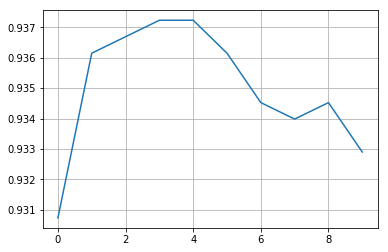

In [ ]:
plt.plot(output.mean(axis = 0))
plt.grid()

In [ ]:
import pickle
#pickle svm cmap
filename = "23_spatio_spectral_classifier_indianPines_SVM_convolution_V4"
with open(filename + "_validation_r.pckl", "wb") as f:
    pickle.dump(output, f)

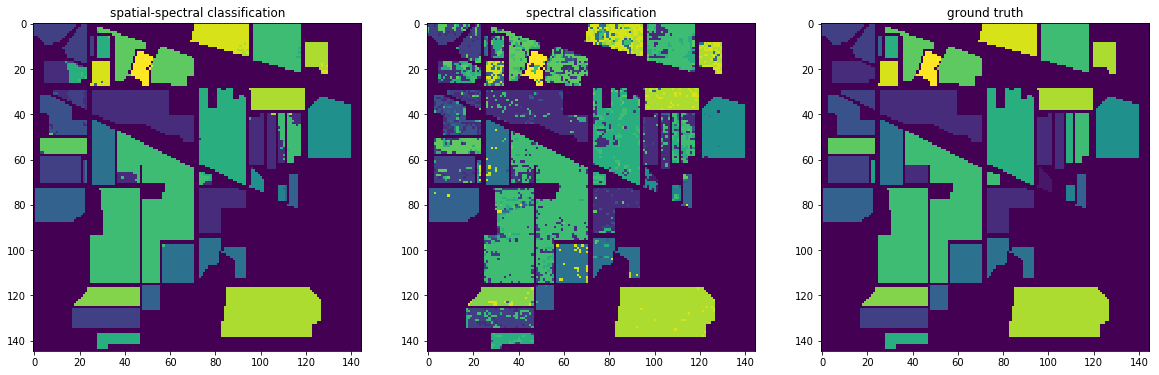

In [ ]:
import matplotlib.cm as cm

plt.figure(1, (20,15))
plt.subplot(1,3,1)
plt.title('spatial-spectral classification')
plt.imshow(output)
plt.subplot(1,3,2)
plt.imshow(G_svm)
plt.title('spectral classification')
plt.subplot(1,3,3)
plt.imshow(G)
plt.title('ground truth')
plt.savefig('IndianPines_cmap.png')